In [1]:
.L src/transform.cpp

In [2]:
.L src/load_dataset.cpp

In [3]:
.L src/track_chain.cpp

In [4]:
.L src/plot.cpp

In [5]:
.x test/track_chain.C

Test results: 4.8884


In [6]:
char const* path {"dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

# First event filter with T1

In [7]:
auto eventsDf = filterT1Events(dataset.df, 0.01).Filter("is_event");
eventsDf.Count().GetValue()

(const unsigned long long) 86297


# Chain calculation
## Only full energy chain for now

In [8]:
auto dfTE= eventsDf.Define(
    "Egamma_chain",
    "track_entry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &edep_pvt)"
);

In [9]:
dfTE.Filter("Egamma_chain == 4.44").Display({"CreatorProcessID", "T1.pdg", "T9.pdg", "T9.trackid", "T9.parentid", "T9.initialEkin"}, 3, 50000)->Print()

+-----+------------------+--------+------------+------------+-------------+----------------+
| Row | CreatorProcessID | T1.pdg | T9.pdg     | T9.trackid | T9.parentid | T9.initialEkin | 
+-----+------------------+--------+------------+------------+-------------+----------------+
| 219 | 0                | 2112   | 22         | 2          | 0           | 4.4400000      | 
|     | 21               | 22     | 11         | 15         | 2           | 0.048734291    | 
|     | 22               |        | 11         | 14         | 2           | 0.0097737458   | 
|     | 22               |        | 11         | 13         | 2           | 0.011234431    | 
|     | 22               |        | 11         | 12         | 2           | 0.021777414    | 
|     | 22               |        | 11         | 11         | 2           | 0.0018299319   | 
|     | 22               |        | 11         | 10         | 2           | 0.032169729    | 
|     | 22               |        | 11         | 9          | 

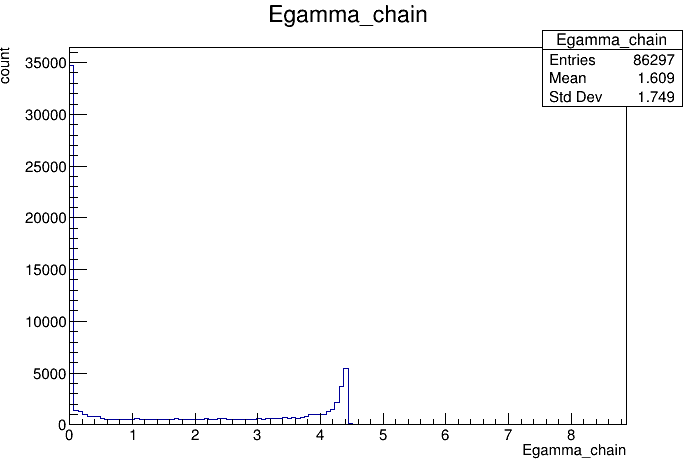

In [10]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfTE.Filter("true").Histo1D("Egamma_chain")->DrawClone();
c.Draw();

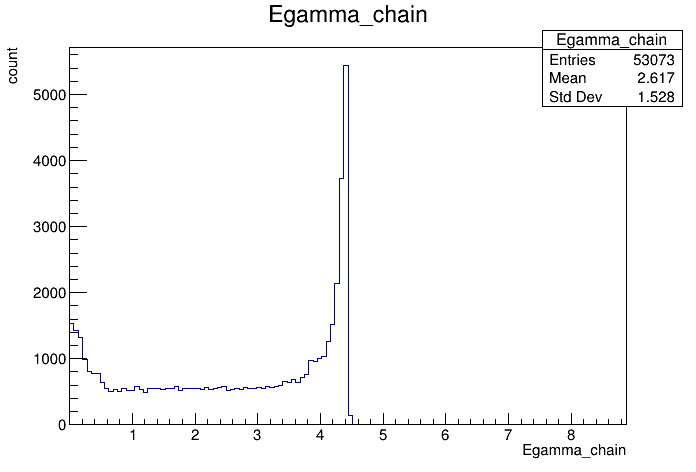

In [11]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfTE.Filter("Egamma_chain").Histo1D("Egamma_chain")->DrawClone();
c.Draw();

We will probably need to filter those escaping gamma events

For now they wont be an issue

In [12]:
savePlot(hist, "E_gamma_chain_dist");

Info in <TCanvas::Print>: pdf file plots/pdf/E_gamma_chain_dist.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/E_gamma_chain_dist.pgf has been created
Info in <TCanvas::Print>: png file plots/png/E_gamma_chain_dist.png has been created


In [13]:
// Ensure that we do not have gamma chain above 4.44 Mev
dfTE.Max("Egamma_chain").GetValue()

(const double) 4.4400000


# First order estimation of compton gamma energy chain
Just taking the most energetic $e^-$ produced by the 4.44 MeV gamma

In [15]:
auto dfCE = dfTE.Define(
    "ComptonEnergy",
    "track_entry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &edep_pvt, true)"
);

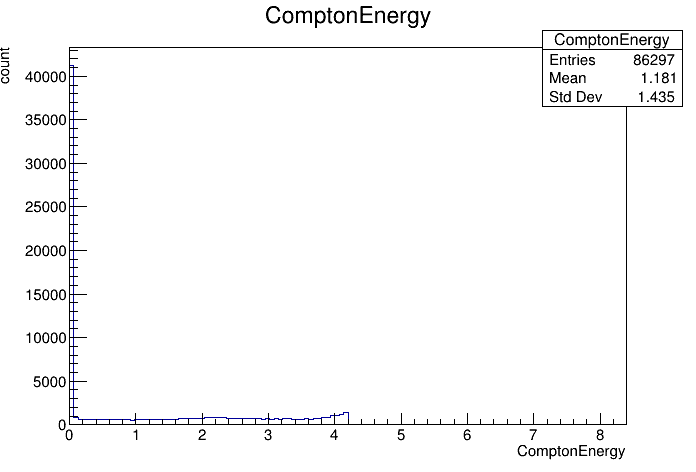

In [16]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfCE.Filter("true").Histo1D("ComptonEnergy")->DrawClone();
c.Draw();

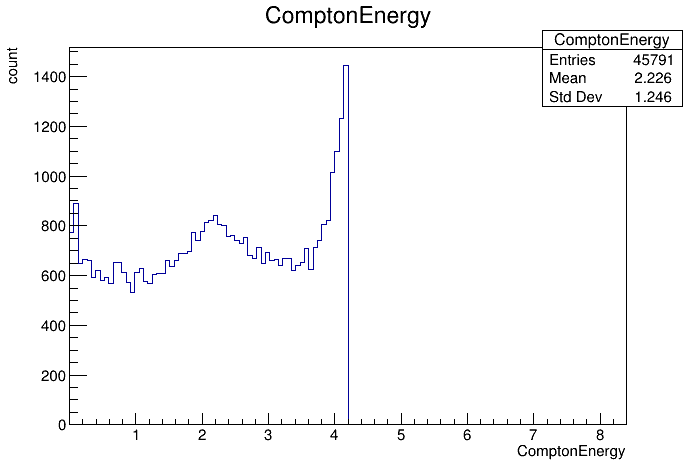

In [17]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfCE.Filter("ComptonEnergy").Histo1D("ComptonEnergy")->DrawClone();
c.Draw();

In [23]:
savePlot(hist, "ComptonEnergy_dist");

Info in <TCanvas::Print>: pdf file plots/pdf/ComptonEnergy_dist.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/ComptonEnergy_dist.pgf has been created
Info in <TCanvas::Print>: png file plots/png/ComptonEnergy_dist.png has been created


In [18]:
dfCE.Max("ComptonEnergy").GetValue()

(const double) 4.1983776


# Total E - CE

In [19]:
auto dfTEmCE = dfCE.Define(
    "TEminusCE",
    "Egamma_chain - ComptonEnergy"
);

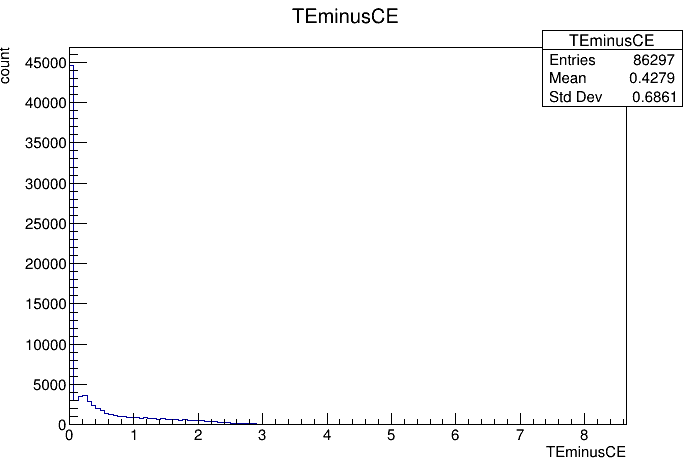

In [21]:
TCanvas c;
auto hist = dfTEmCE.Filter("true").Histo1D("TEminusCE")->DrawClone();
c.Draw();

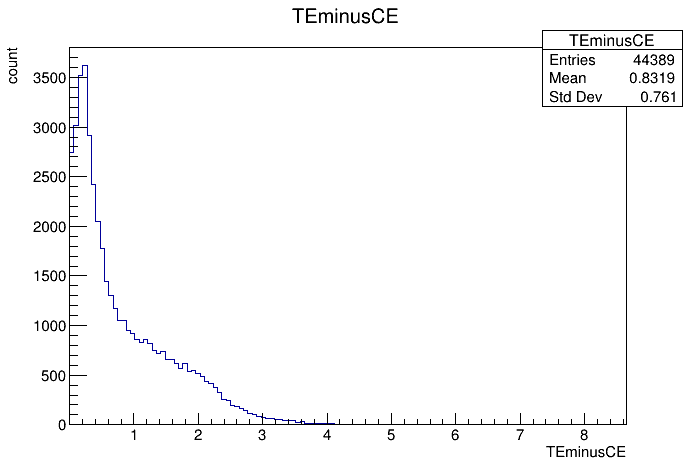

In [22]:
TCanvas c;
auto hist = dfTEmCE.Filter("TEminusCE").Histo1D("TEminusCE")->DrawClone();
c.Draw();

In [ ]:
savePlot(hist, "TEminusCE_dist");